# Avocado Prices
## Historical data on avocado prices and sales volume in multiple US markets

In [1]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

In [2]:
dataset= pd.read_csv('C:\\Users\\LENOVO\\Desktop\\Projects\\Time Series Forecasting\\Avacado price forecasting using prophe//avocado.csv')

In [3]:
# Understanding the data

# Let’s first look at the columns and the data

dataset.head(2)

Unnamed: 0        Date  AveragePrice  Total Volume     4046      4225  \
0           0  2015-12-27          1.33      64236.62  1036.74  54454.85   
1           1  2015-12-20          1.35      54876.98   674.28  44638.81   

    4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0  48.16     8696.87     8603.62       93.25          0.0  conventional  2015   
1  58.33     9505.56     9408.07       97.49          0.0  conventional  2015   

   region  
0  Albany  
1  Albany

In [4]:
# Let’s print the information about the dataset that includes columns, 
# data type of the columns and if the column is null or not null

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
# We see two categorical variables, type and region. Let’s examine them

dataset.describe(include='O')

Date          type        region
count        18249         18249         18249
unique         169             2            54
top     2016-04-17  conventional  Indianapolis
freq           108          9126           338

### Converting categorical variable to numeric using LabelEncoder
#### We convert categorical variable, type which has two distinct values to numeric value.To convert categorical variable to numeric value we use LabelEncoder. We are not converting categorical variable, region for this example.

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.iloc[:,11] = le.fit_transform(dataset.iloc[:,11])
dataset.head(2)

Unnamed: 0        Date  AveragePrice  Total Volume     4046      4225  \
0           0  2015-12-27          1.33      64236.62  1036.74  54454.85   
1           1  2015-12-20          1.35      54876.98   674.28  44638.81   

    4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0  48.16     8696.87     8603.62       93.25          0.0     0  2015  Albany  
1  58.33     9505.56     9408.07       97.49          0.0     0  2015  Albany

In [7]:
# Creating input features(X) and target variable(y)

X= dataset[['Date','Total Volume', '4046', '4225', '4770','Small Bags', 'Large Bags', 'XLarge Bags', 'type']]
y= dataset.iloc[:,2]

In [8]:
X.shape

(18249, 9)

In [9]:
# Creating the data set for Prophet
# As mentioned earlier, input to Prophet is a data frame with minimum two columns : ds and y

train_dataset= pd.DataFrame()
train_dataset['ds'] = pd.to_datetime(X["Date"])
train_dataset['y']=y
train_dataset.head(2)

ds     y
0 2015-12-27  1.33
1 2015-12-20  1.35

In [55]:
train_dataset.ds.max()

Timestamp('2018-03-25 00:00:00')

In [56]:
train_dataset.ds.min()

Timestamp('2015-01-04 00:00:00')

### Creating and fitting the Prophet model with default values
#### We will first explore the default Prophet model. Create the Prophet instance with all default values, fit the dataset.

In [57]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
import warnings 
warnings.filterwarnings('ignore')

### Predicting the values for the future
#### For predicting the values using Prophet, we need to create a dataframe with ds(datetime stamp) containing the dates for which we want to make the predictions.
#### We use make_future_dataframe() to which we specify the number of days to extend into the future. By default it includes dates from the history

In [59]:
future= prophet_basic.make_future_dataframe(periods=300)
future.tail(2)

ds
18547 2019-01-18
18548 2019-01-19

#### Total number of rows in original dataset was 18249 and we see that the future data frame that we created for prediction contains historical dates as well as additional 300 dates.

In [60]:
forecast=prophet_basic.predict(future)


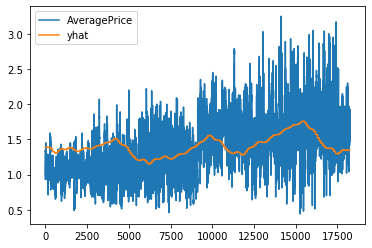

In [61]:
dataset['yhat'] = forecast['yhat']
dataset['AveragePrice'].plot(legend=True)
dataset['yhat'].plot(legend= True)

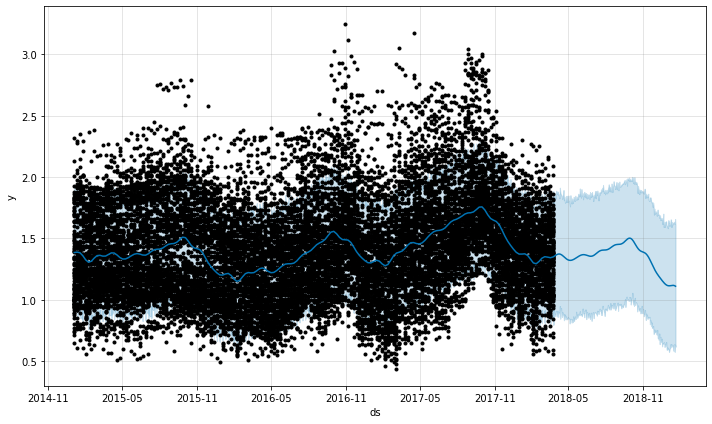

In [26]:
# Plotting the predicted data

fig1 =prophet_basic.plot(forecast)

## Plotting the forecasted components
#### We can plot the trend and seasonality, components of the forecast.


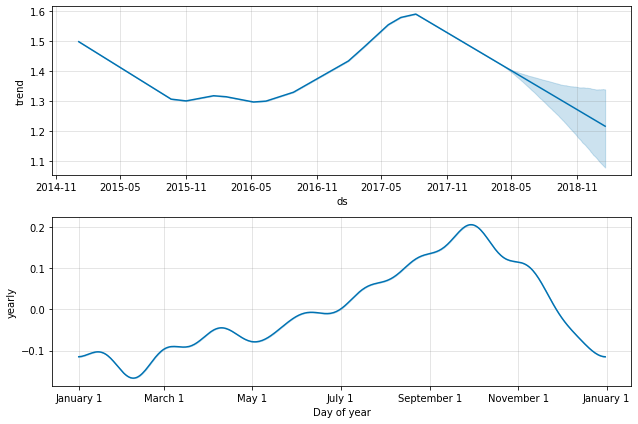

In [27]:
fig1 = prophet_basic.plot_components(forecast)

## Adding ChangePoints to Prophet
#### Changepoints are the datetime points where the time series have abrupt changes in the trajectory.
#### By default, Prophet adds 25 changepoints to the initial 80% of the data-set.
#### Let’s plot the vertical lines where the potential changepoints occurred

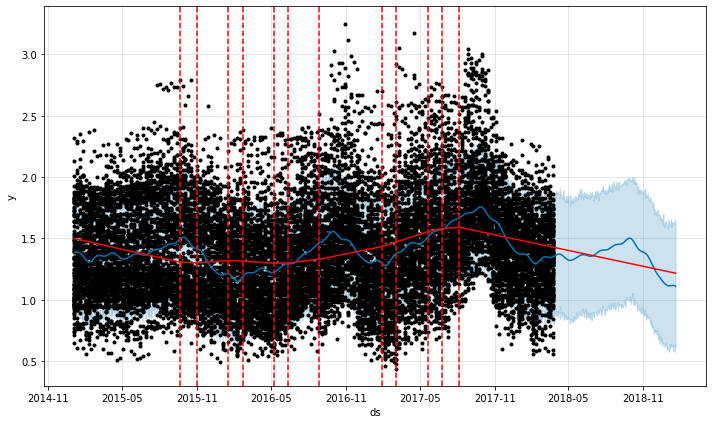

In [28]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [29]:
# We can view the dates where the chagepoints occurred

prophet_basic.changepoints

584     2015-02-08
1168    2015-03-15
1752    2015-04-26
2336    2015-05-31
2920    2015-07-12
3504    2015-08-16
4087    2015-09-20
4671    2015-11-01
5255    2015-12-06
5839    2016-01-17
6423    2016-02-21
7007    2016-03-27
7591    2016-05-08
8175    2016-06-12
8759    2016-07-24
9343    2016-08-28
9927    2016-10-02
10511   2016-11-13
11094   2016-12-18
11678   2017-01-29
12262   2017-03-05
12846   2017-04-09
13430   2017-05-21
14014   2017-06-25
14598   2017-08-06
Name: ds, dtype: datetime64[ns]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


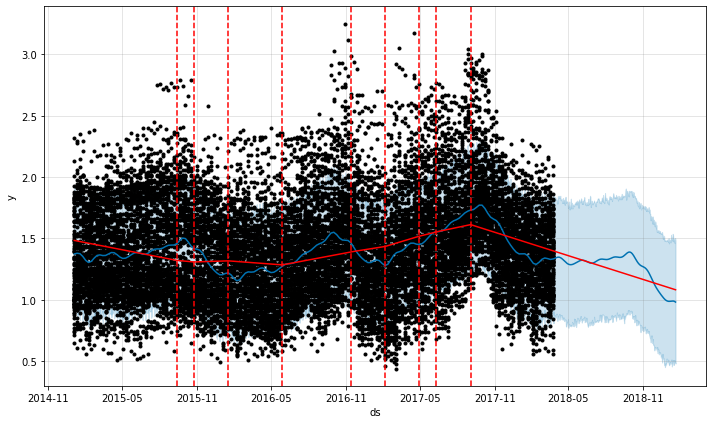

In [30]:
# We can change the inferred changepoint range by setting the changepoint_range

pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

The number of changepoints can be set by using the n_changepoints parameter when initializing prophet

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


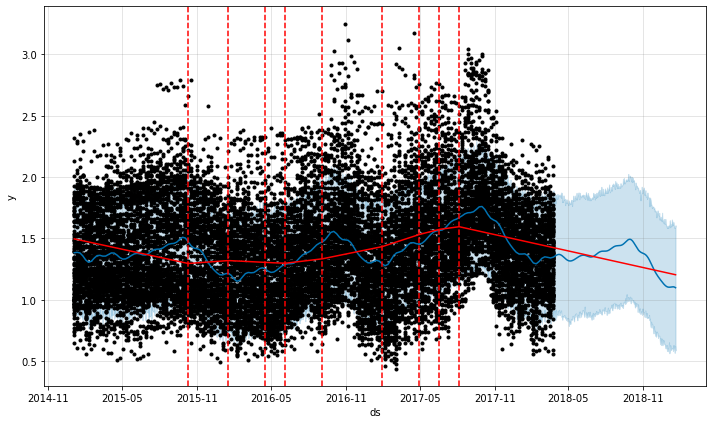

In [31]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

## Adjusting Trend
### Prophet allow you to adjust the trend in case there is an overfit or underfit. changepoint_prior_scale helps adjust the strength of the trend.
### Default value for changepoint_prior_scale is 0.05. Decrease the value to make the trend less flexible. Increase the value of changepoint_prior_scale to make the trend more flexible.
#### Increasing the changepoint_prior_scale to 0.08 to make the trend flexible

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


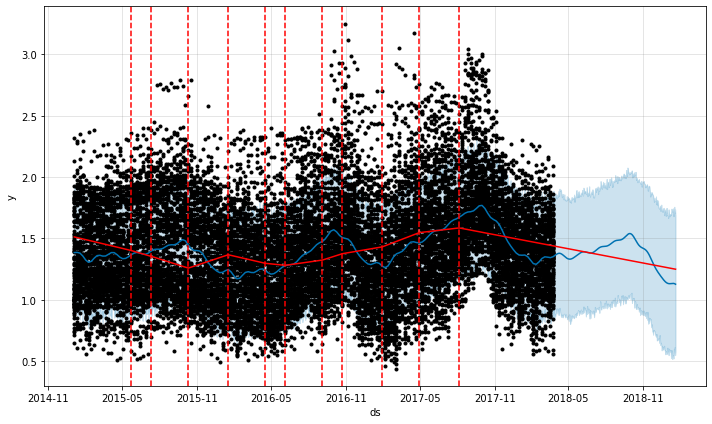

In [32]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

### Decreasing the changepoint_prior_scale to 0.001 to make the trend less flexible


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


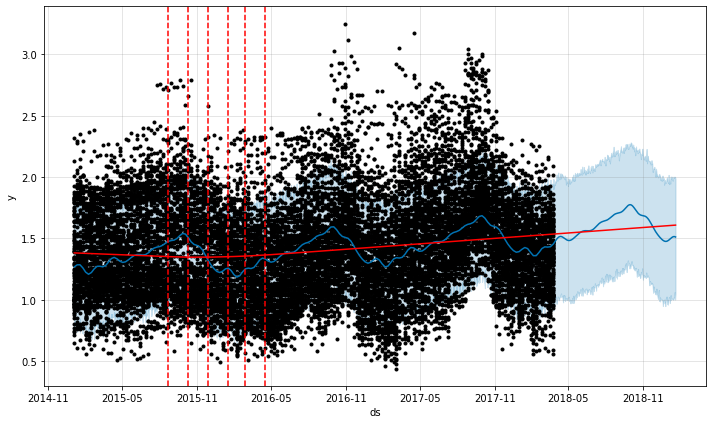

In [33]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

## Adding Holidays
#### Holidays and events can cause changes to a time series. In our example the National Avocado day on July 31 and Guacamole day on September 16 can impact prices of the Avocado.
#### We can create a custom holiday list for Prophet by creating a dataframe with two columns ds and holiday. A row for each occurrence of the holiday

In [34]:
avocado_season = pd.DataFrame({
  'holiday': 'avocado season',
  'ds': pd.to_datetime(['2014-07-31', '2014-09-16', 
                        '2015-07-31', '2015-09-16',
                        '2016-07-31', '2016-09-16',
                        '2017-07-31', '2017-09-16',
                       '2018-07-31', '2018-09-16',
                        '2019-07-31', '2019-09-16']),'lower_window': -1,
  'upper_window': 0,
})

#### lower window and upper window extend holiday to days around the date. If we want to include a day prior to the national avocado day and Guacamole day, we set lower_window: -1 upper_window: 0
#### If we wanted to use the day after the holiday then set lower_window: 0 upper_window: 1

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


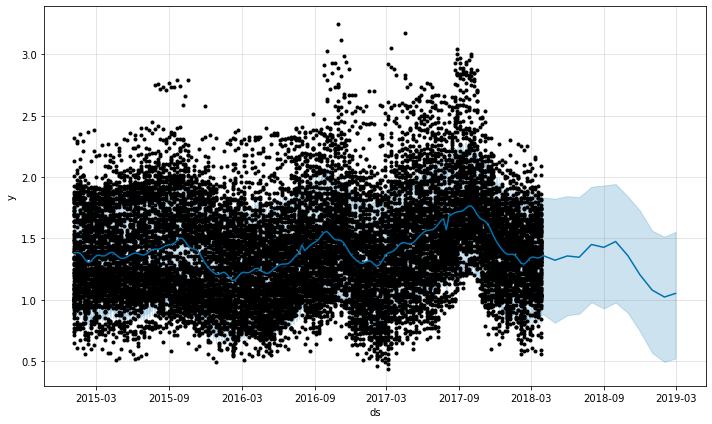

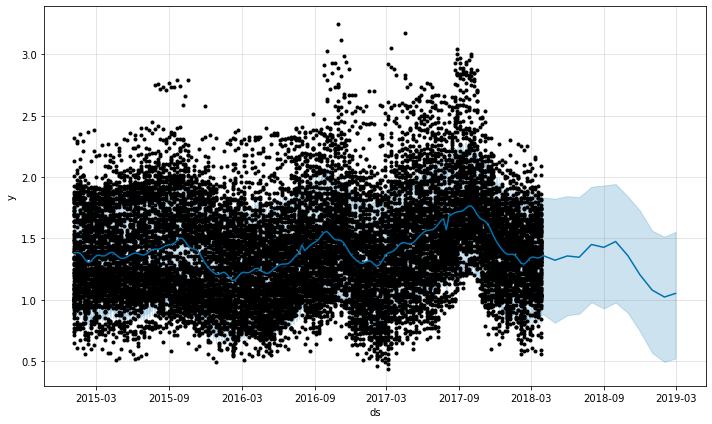

In [35]:
pro_holiday= Prophet(holidays=avocado_season)
pro_holiday.fit(train_dataset)
future_data = pro_holiday.make_future_dataframe(periods=12, freq = 'm')
 
#forecast the data for future data
forecast_data = pro_holiday.predict(future_data)
pro_holiday.plot(forecast_data)

### Adding Multiple Regressors
#### Additional regressors can be added to the Prophet model. This is done by using add_regressor. Additional regressor column value needs to be present in both the fitting as well as prediction dataframes.
#### Creating fitting and predicting dataset with additional regressors

In [46]:
train_dataset['type'] = X['type']
train_dataset['Total Volume'] = X['Total Volume']
train_dataset['4046'] = X['4046']
train_dataset['4225'] = X['4225']
train_dataset['4770'] = X['4770']
train_dataset['Small Bags'] = X['Small Bags']
train_X= train_dataset[:18000]
test_X= train_dataset[18000:]


In [47]:
train_X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ds            18000 non-null  datetime64[ns]
 1   y             18000 non-null  float64       
 2   type          18000 non-null  int32         
 3   Total Volume  18000 non-null  float64       
 4   4046          18000 non-null  float64       
 5   4225          18000 non-null  float64       
 6   4770          18000 non-null  float64       
 7   Small Bags    18000 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int32(1)
memory usage: 1.0 MB


#### we split our data set to demonstrate the use of the additional regressor as we need all the additional regressors values in both fitting and predicting data frames

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


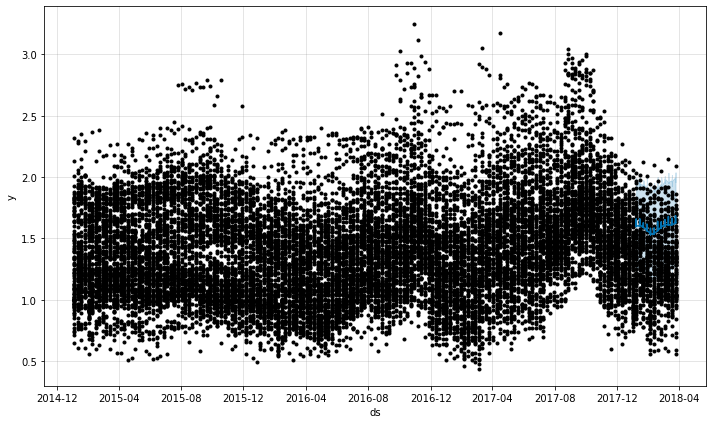

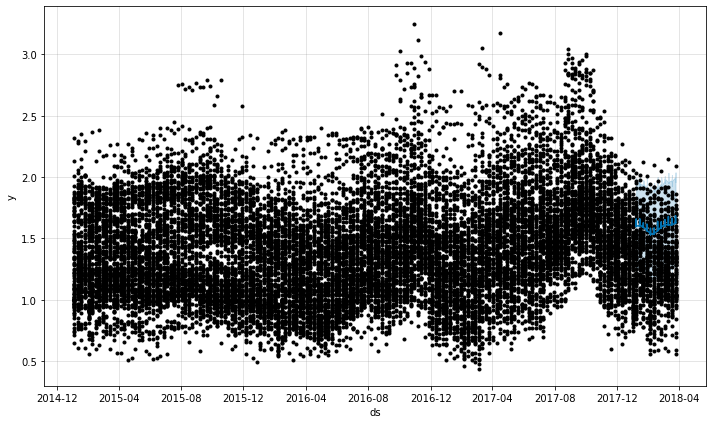

In [48]:
#Additional Regressor
pro_regressor= Prophet()
pro_regressor.add_regressor('type')
pro_regressor.add_regressor('Total Volume')
pro_regressor.add_regressor('4046')
pro_regressor.add_regressor('4225')
pro_regressor.add_regressor('4770')
pro_regressor.add_regressor('Small Bags')

#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=249)


#forecast the data for Test  data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data)

In [50]:
X.columns

Index(['Date', 'Total Volume', '4046', '4225', '4770', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type'],
      dtype='object')

In [52]:
forecast_data.yhat

0      1.602837
1      1.596510
2      1.608278
3      1.604153
4      1.602627
         ...   
244    1.626091
245    1.626827
246    1.628981
247    1.627322
248    1.627169
Name: yhat, Length: 249, dtype: float64